<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1) Identifying the Problem

In this analysis we will be able to predict the housing prices based on crime rate, average number of rooms, distance to city, etc.

# Step 2) Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Step 3) Load the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zubaidak/ML-data/main/housing_prices.csv')

# Step 4) Exploratory Data Analysis

In [3]:
df.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36200.0


In [4]:
df.describe()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crime_rate             506 non-null    float64
 1   big_lots_percent       506 non-null    float64
 2   office_percent         506 non-null    float64
 3   charles_river          506 non-null    float64
 4   nitrous                506 non-null    float64
 5   avg_num_rooms          506 non-null    float64
 6   pre_1940               506 non-null    float64
 7   distance_to_city       506 non-null    float64
 8   highway_access         506 non-null    float64
 9   tax_rate               506 non-null    float64
 10  student_teacher_ratio  506 non-null    float64
 11  median_price           506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [6]:
df.isnull().value_counts()
# data is clean, no null values

crime_rate  big_lots_percent  office_percent  charles_river  nitrous  avg_num_rooms  pre_1940  distance_to_city  highway_access  tax_rate  student_teacher_ratio  median_price
False       False             False           False          False    False          False     False             False           False     False                  False           506
dtype: int64

In [7]:
df.groupby('avg_num_rooms').size()

avg_num_rooms
3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.375    1
8.398    1
8.704    1
8.725    1
8.780    1
Length: 446, dtype: int64

# Step 5) Data Visualization

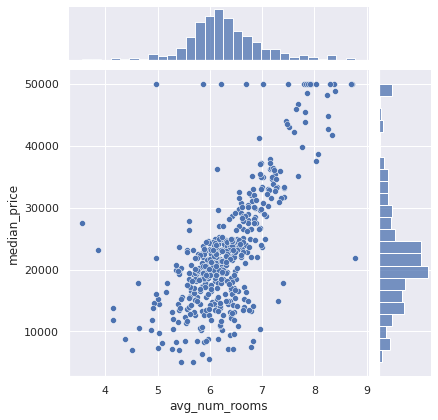

In [8]:
sns.jointplot(x="avg_num_rooms", y="median_price", data=df)

In the jointplot above it can be seen that there is a linear relationship between the median price and average number of rooms. 

As the number of rooms increase, so does the value of house. 

This also lets us know that using Linear regression model may lead to more accurate results.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


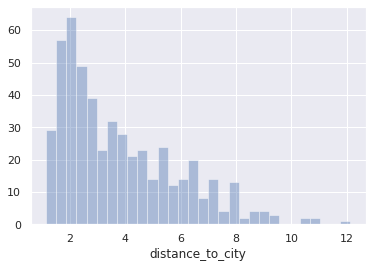

In [9]:
sns.distplot(df['distance_to_city'], kde=False, bins=30)

In the bar graph above, there is bigger cluster from the range 1-3 for distance to the city. This means that there are more people living in areas closer to the city compared to further distances.

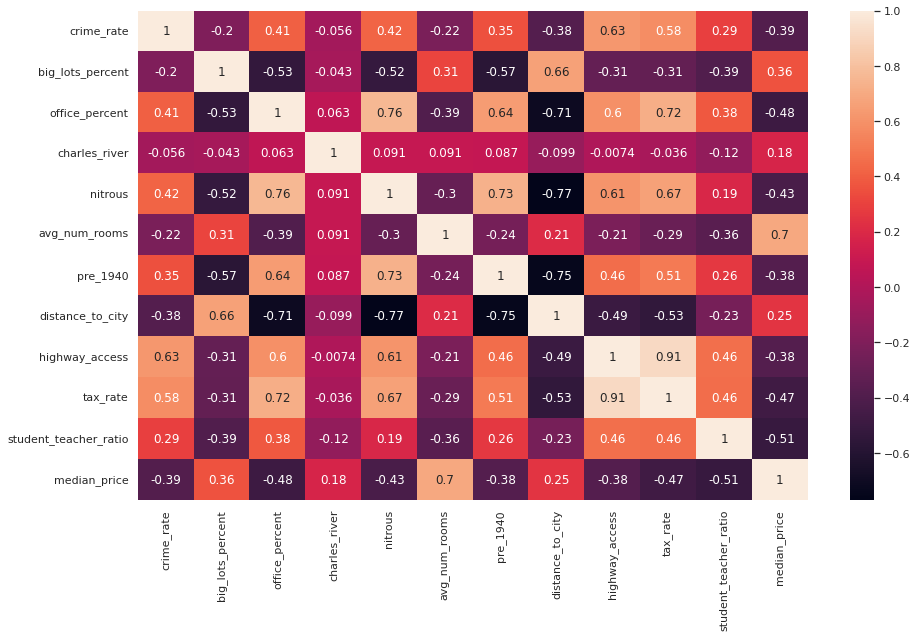

In [10]:
plt.figure(figsize=(15,9)) 
sns.heatmap(df.corr(), annot=True)

In [11]:
#

# Step 6) Train, Test, Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
factors = df ['avg_num_rooms']
price = df['median_price']

In [14]:
# Change x into 2D array
X = np.array(factors).reshape(-1, 1)
Y = np.array(price).reshape(-1, 1)

In [15]:
# we have to split the data into 2 sets
# training set (train model to do) and test set (test the model)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

# Step 7) Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df)

StandardScaler()

In [19]:
dataset_feat = pd.DataFrame(columns=df.columns[:-1])
dataset_feat.head()

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio


# Step 8) Build Models

## Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

### Split#1

Using `avg_num_rooms` as the main factor to be compared with median price, we will be able to create a linear regression.

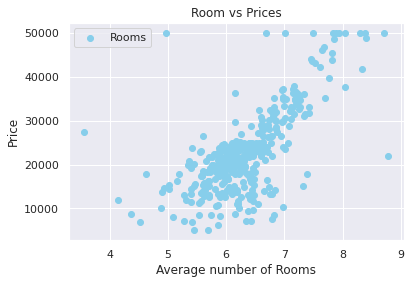

In [21]:
plt.scatter(X_train[:,0], Y_train, color="skyblue", label = "Rooms")
plt.title("Room vs Prices")
plt.xlabel("Average number of Rooms")
plt.ylabel("Price")
plt.legend()
plt.show()

In [22]:
regressor = LinearRegression()
# Splitting the data into training and testing data

In [23]:
regressor.fit(X_train, Y_train)
# to train the model to the fit method

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)
# plot the accuracy of how the model is looking
# want to see the prediction line

In [25]:
regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

0.46790005431367787


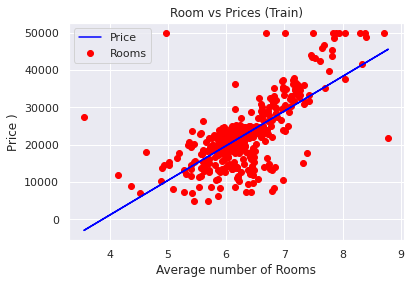

In [26]:
# Visualize training set
plt.scatter(X_train[:, 0], Y_train, color="red", label = "Rooms")
plt.title("Room vs Prices (Train)")
plt.plot(X_train[:, 0], regressor.predict(X_train), color="blue", label="Price")
plt.xlabel("Average number of Rooms")
plt.ylabel("Price )")
plt.legend()
plt.show()

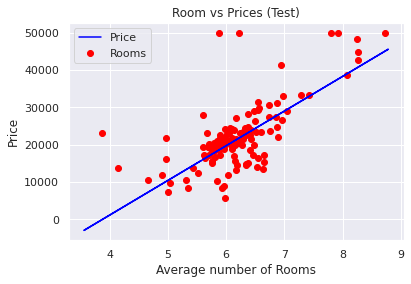

In [27]:
# Visualizing test set
plt.scatter(X_test[:, 0], Y_test, color="red", label = "Rooms")
plt.title("Room vs Prices (Test)")
plt.plot(X_train[:,0], regressor.predict(X_train), color="blue", label="Price")
plt.xlabel("Average number of Rooms")
plt.ylabel("Price")
plt.legend()
plt.show()

In [28]:
number = int(input('Enter the number of rooms: '))
price = regressor.predict([[number]])
print('House of %d rooms cost about $%d' % (number, price))

Enter the number of rooms: 6
House of 6 rooms cost about $19696


### Split #2

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

0.4715223945248189


### Split #3

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.score(X_test, Y_test))

0.540060199027058


Using the split with 54% accuracy, create a visualization. 

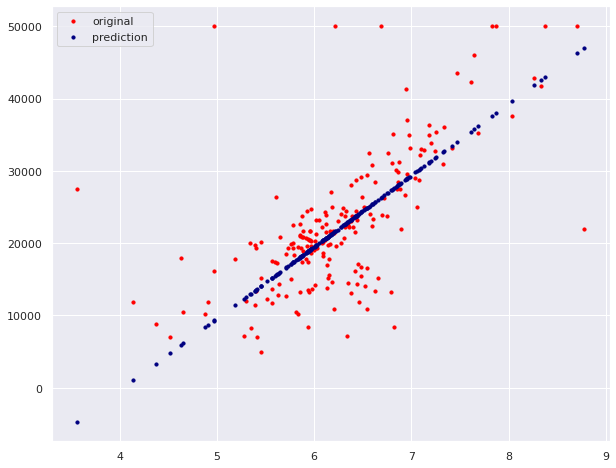

In [31]:
plt.figure(figsize=(10,8))
Y_pred = regressor.predict(X_test)
plt.scatter(X_test, Y_test, s = 10, color="red", label="original")
plt.scatter(X_test, Y_pred, s = 10, color="navy", label="prediction")
plt.legend()
plt.show()

In the Linear Regression model, the accuracy of the models increased as the testing size increased (from 46% accuracy to 54% accuracy). This model isn't highly accurate but is functionable. 

##KNR

Because this data set has more linear relationship, it is better to look at previous data and make predictions. Hence why we will use K-NeighborsRegressor in order to make predictions within a specific range.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr

KNeighborsRegressor(n_neighbors=3)

In [34]:
knr.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
y_pred_knr = knr.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
knr_prediction_accuracy = knr.score(X_train, Y_train)
print(knr_prediction_accuracy)

0.7610064462678287


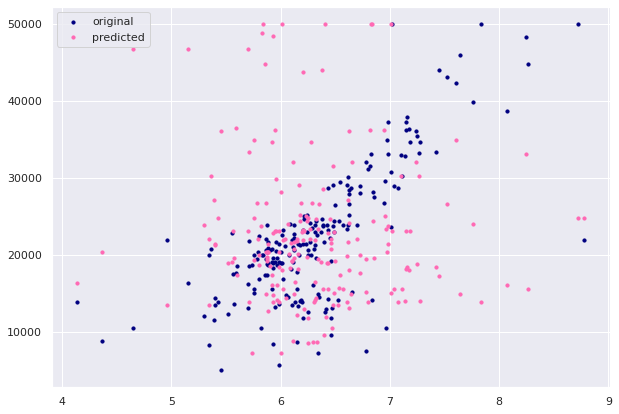

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, Y_test, s = 10, color="navy", label="original")
plt.scatter(X_test, y_pred_knr, s = 10, color="hotpink", label="predicted")
plt.legend()
plt.show()

When using 3 neighbors, the accuracy of the model is %.

Now lets try with 2 Neighbors.

In [39]:
knr = KNeighborsRegressor(n_neighbors = 2)
knr.fit(X_train, Y_train)
y_pred_knr = knr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Accuracy score
knr_prediction_accuracy = knr.score(X_train, Y_train)
print(knr_prediction_accuracy)

0.7923242626631597


Lastly lets try with 1 neighbor.

In [40]:
knr = KNeighborsRegressor(n_neighbors = 1)
knr.fit(X_train, Y_train)
y_pred_knr = knr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# Accuracy score
knr_prediction_accuracy = knr.score(X_train, Y_train)
print(knr_prediction_accuracy)

0.9084193307672243


Using KNR for 1 neighbor has the highest accuracy out of all the neighbors with a total of 90.8% accuracy. That is a high number and is just enough to **not** be considered overfeeding.

#Conclusion

This concludes my analysis on the `Housing Prices` dataset where I was able to create predictions with accuracy up to 90.8%. This takes in consideration of crime rate, average number of rooms, distance to city, etc.


With the Logistic Regression model, my accuracy was 54% which was not the highest but was consistently increasing as the test size increased. This meant the model will become more accurate as the test size increases.
In the K-Neighbor Regressor, the accuracy was 90.8% which is a big jump from the accuracy score of the Logistic Regression model. The reason behind the drastic difference may be because this model looks at previous data in order to predict the future (Supervised learning/regression). 

Overall, the biggest pattern found from this analysis was that most of the data directly effects each other. For example in the first jointplot graph, as the number of rooms increased, so did the median price of the house. The next graph also shows similar patterns as the distance of the house from the city increased, there were less houses hence hinting the prices would be lowered. This is furthered prooved true when looking at the heatmap graph for `median_price` and `distance_to_city`.